# 4. Regularización

## 4.0 Introduccion

La regularizacion es un conjuntos de tecnicas que se usan para prevenir el ***Overfitting***. La regularización agrega información a un problema, a menudo en forma de penalización contra la complejidad, a un problema.

El metodo de minimos cuadrados ordinario tiene como objetivo minimizar la suma de cuadros residuales ( $SS_{res}={\sum_{i=1}^m}(y_i-F(x_1,x_2,...,x_n))^2$ ).

Pero hay dos razones por las que el metodo de minimos cuadrados podria ser no adecuado para estimar modelo con variables no relevantes , es decir con poco capacidad predictora.

*   ***Baja precisión en las predicciones***. El estimador a menudo presenta
poco sesgo pero gran varianza, lo cual se traduce en un pobre poder
predictivo sobre nuevas observaciones
*   ***Falta de interpretabilidad***. Si se utiliza un gran número de predictores
(necesario para tener bajo sesgo ante un problema más o menos
complejo), sería deseable determinar un pequeño subconjunto de éstos
con fuerte poder explicativo y predictivo, ya que con $m>>n$ el estimador no estara bien definido.


## 4.1 Tecnica de regularizacion en modelos lineales

En la regularizacion se agrega informacion , en la funcion de costo. Con esto la suma de cuadrados residuales queda de la siguiente manera:

\begin{equation}
RSS={\sum_{i=1}^m}(y_i-(a+b_1x_1+b_2x_2+...+b_nx_n))^2 + φ_λ (b)
\end{equation}

\begin{equation}
b=(b_1,b_2,...,b_n)
\end{equation}

\begin{equation}
λ>0
\end{equation}

\begin{equation}
φ_λ (b) = λ{\sum_{j=1}^n}(φ_j(|b_j|))
\end{equation}

Donde $φ_λ (b)$ es una funcion creciente de penalizacion que depende de $b$



## 4.2 Familia Bridge o Tikhonov

Una familia de funciones de penalizacion muy utilizada son normal $Lq$ , de la siguente forma:

\begin{equation}
φ_λ (b) = λ{\sum_{j=1}^n}(|b_j|^q) 
\end{equation}

Donde  $q>0$ , las mas conocidas son :

*   ***Ridge*** de norma $L2$ es cuando $(q=2)$
*   ***Lasso*** de norma $L1$ es cuando $(q=1)$
*   ***Elastic Net*** , es una combinacion de Ridge y Lasso


### 4.2.0 Regresión Ridge





Esta técnica fue propuesta originalmente por Hoerl y Kennard como un método para eludir los efectos adversos del ***problema de colinealidad en
un modelo lineal estimado por mínimos cuadrados*** , en el contexto m < n,
la funcion de coste es :

\begin{equation}
RSS_{Ridge}={\sum_{i=1}^m}(y_i-(a+b_1x_1+b_2x_2+...+b_nx_n))^2 + λ{\sum_{i=1}^nb_j^2} 
\end{equation}

Donde la solucion :

\begin{equation}
B^{Ridge}(λ)=(X^TX+λI_n)^{-1}X^TY
\end{equation}
\begin{equation}
I_n=(X^TX)^{-1}(X^TX)
\end{equation}
\begin{equation}
X=
\begin{bmatrix}
x_{11}& x_{21} & ... &x_{n1}\\
x_{12}& x_{22} & ... &x_{n2}\\
 . & . & ... & .\\
 . & . & ... & .\\
 . & . & ... & .\\
x_{1m}& x_{2m} & ... &x_{nm}
\end{bmatrix}
\end{equation}

\begin{equation}
Y=
\begin{bmatrix}
y_{1}\\
y_{2}\\
 .\\
 .\\
 .\\
y_{m}
\end{bmatrix}
; B^{Ridge}=
\begin{bmatrix}
b_{1}\\
b_{2}\\
 .\\
 .\\
 .\\
b_{m}
\end{bmatrix}
\end{equation}









#### 4.2.0.0 Numpy

[[1.08548851]
 [0.65517241]]


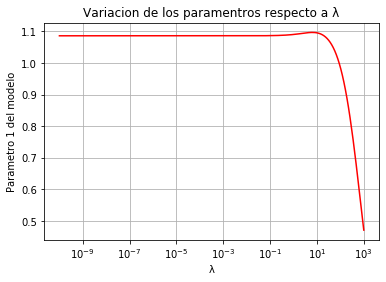

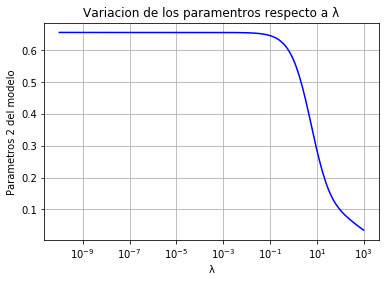

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import dot, transpose


X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]


#L=np.linspace(0.001,100,200)
n_alphas = 200
L = np.logspace(-10, 3, n_alphas)

cof_1_ridge=[]
cof_2_ridge=[]
cof_1_lineal=[]
cof_2_lineal=[]

for i in L:
  I_L=[[i,0],[0,i]]
  coef_ridge=dot(  inv(dot(transpose(X), X)+I_L), dot(transpose(X), y) )
  coef_lineal=dot(inv(dot(transpose(X), X)), dot(transpose(X), y))
  
  cof_1_ridge.append(coef_ridge[0][0])
  cof_2_ridge.append(coef_ridge[1][0])

  cof_1_lineal.append(coef_lineal[0][0])
  cof_2_lineal.append(coef_lineal[1][0])



print(coef_lineal)

plt.figure(1)
plt.xscale('log')
plt.plot(L,cof_1_ridge,'r-')
#plt.plot(L,cof_1_lineal,'r.')
plt.xlabel('λ')
plt.ylabel('Parametro 1 del modelo')
plt.title('Variacion de los paramentros respecto a λ')
plt.grid(True)

plt.figure(2)
plt.xscale('log')
plt.plot(L,cof_2_ridge,'b-')
#plt.plot(L,cof_2_lineal,'b.')
plt.xlabel('λ')
plt.ylabel('Parametros 2 del modelo')
plt.title('Variacion de los paramentros respecto a λ')
plt.grid(True)
plt.show()

#### 4.2.0.1 sklearn 

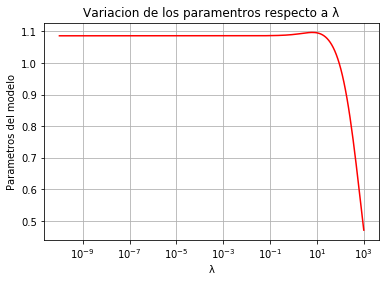

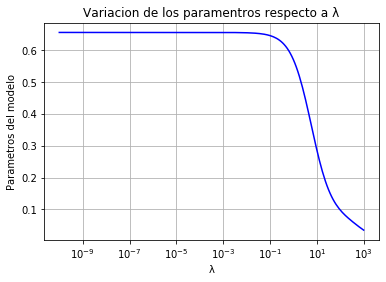

In [5]:
# 
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import dot, transpose
from sklearn import linear_model


X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]

#X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
#y_test = [[11], [8.5], [15], [18], [11]]

#Calculo de los parametros para distintos landas
#L=np.linspace(0.001,10,20)
n_alphas = 200
L = np.logspace(-10, 3, n_alphas)

cof_1=[]
cof_2=[]
for i in L:
    ridge = linear_model.Ridge(alpha=i, fit_intercept=False)
    ridge.fit(X, y)
    cof_1.append(ridge.coef_[0][0])
    cof_2.append(ridge.coef_[0][1])

plt.figure(1)
plt.xscale('log')
plt.plot(L,cof_1,'r-')
plt.xlabel('λ')
plt.ylabel('Parametros del modelo')
plt.title('Variacion de los paramentros respecto a λ')
plt.grid(True)

plt.figure(2)
plt.xscale('log')
plt.plot(L,cof_2,'b-')
plt.xlabel('λ')
plt.ylabel('Parametros del modelo')
plt.title('Variacion de los paramentros respecto a λ')
plt.grid(True)
plt.show()

### 4.2.1 Regresión Lasso

LASSO (Least Absolute Shrinkage and Selection Operator) es una técnica de regresión lineal regularizada que aplica una penalización, como Ridge, con una diferencia en la penalización (norma 𝐿1 en lugar de 𝐿2 ) que implica consecuencias importantes. LASSO resuelve el problema de mínimos cuadrados con restricción sobre la norma 𝐿1 del vector de coeficientes:
la funcion de coste es :

\begin{equation}
RSS_{LASSO}={\sum_{i=1}^m}(y_i-(a+b_1x_1+b_2x_2+...+b_nx_n))^2 + λ{\sum_{i=1}^n|b_j|} 
\end{equation}

Donde la solucion :

\begin{equation}
B^{Lasso}(λ)=X^TY-\frac{λ}{2}Sign(B)
\end{equation}
\begin{equation}
B^{Lasso}_j=X^TY+\frac{λ}{2} , (X^TY)_j<-\frac{λ}{2}
\end{equation}
\begin{equation}
B^{Lasso}_j=X^TY-\frac{λ}{2} , (X^TY)_j>\frac{λ}{2}
\end{equation}
\begin{equation}
B^{Lasso}_j=0 , -\frac{λ}{2}<(X^TY)_j<\frac{λ}{2}
\end{equation}
\begin{equation}
\end{equation}
\begin{equation}
X=
\begin{bmatrix}
x_{11}& x_{21} & ... &x_{n1}\\
x_{12}& x_{22} & ... &x_{n2}\\
 . & . & ... & .\\
 . & . & ... & .\\
 . & . & ... & .\\
x_{1m}& x_{2m} & ... &x_{nm}
\end{bmatrix}
\end{equation}

\begin{equation}
Y=
\begin{bmatrix}
y_{1}\\
y_{2}\\
 .\\
 .\\
 .\\
y_{m}
\end{bmatrix}
; B^{Ridge}=
\begin{bmatrix}
b_{1}\\
b_{2}\\
 .\\
 .\\
 .\\
b_{m}
\end{bmatrix}
\end{equation}

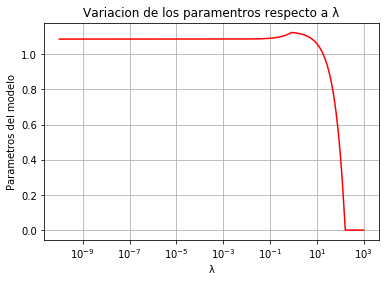

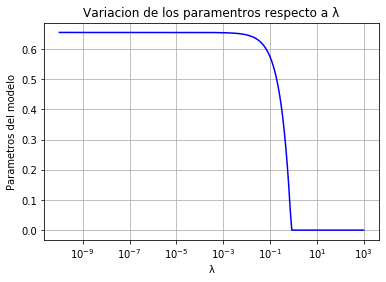

In [4]:
# sklearn
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import dot, transpose
from sklearn import linear_model

X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]

#X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
#y_test = [[11], [8.5], [15], [18], [11]]

#Calculo de los parametros para distintos landas
#L=np.linspace(0.001,10,20)
n_alphas = 200
L = np.logspace(-10, 3, n_alphas)

cof_1=[]
cof_2=[]
for i in L:
    Lasso = linear_model.Lasso(alpha=i, fit_intercept=False)
    Lasso.fit(X, y)
    cof_1.append(Lasso.coef_[0])
    cof_2.append(Lasso.coef_[1])

plt.figure(1)
plt.xscale('log')
plt.plot(L,cof_1,'r-')
plt.xlabel('λ')
plt.ylabel('Parametros del modelo')
plt.title('Variacion de los paramentros respecto a λ')
plt.grid(True)

plt.figure(2)
plt.xscale('log')
plt.plot(L,cof_2,'b-')
plt.xlabel('λ')
plt.ylabel('Parametros del modelo')
plt.title('Variacion de los paramentros respecto a λ')
plt.grid(True)
plt.show()

### 4.2.1 Regresión Elastic Net

La regresion Elastic Net es una combinacion de de Rigde y Lasso , la funcion de coste seria de la siguiente forma:


\begin{equation}
RSS_{ElasticNet}={\sum_{i=1}^m}(y_i-(a+b_1x_1+b_2x_2+...+b_nx_n))^2 + λ_1{\sum_{i=1}^n|b_j|} +λ_2{\sum_{i=1}^n|b_j|^2}
\end{equation}

Esta se puede transformar en :
\begin{equation}
RSS_{ElasticNet}={\sum_{i=1}^m}(y_i-(a+b_1x_1+b_2x_2+...+b_nx_n))^2 + α{\sum_{i=1}^n|b_j|} +(1-α){\sum_{i=1}^n|b_j|^2}
\end{equation}


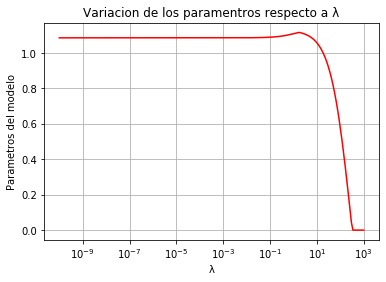

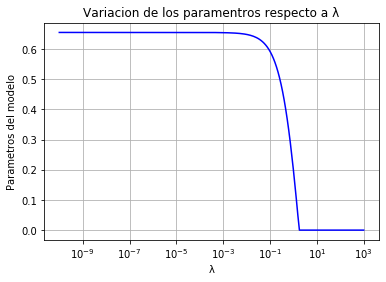

In [3]:
# sklearn
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import dot, transpose
from sklearn import linear_model


X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]

#X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
#y_test = [[11], [8.5], [15], [18], [11]]

#Calculo de los parametros para distintos landas
#L=np.linspace(0.001,10,20)
n_alphas = 200
L = np.logspace(-10, 3, n_alphas)

cof_1=[]
cof_2=[]
for i in L:
    Lasso = linear_model.ElasticNet(alpha=i, fit_intercept=False)
    Lasso.fit(X, y)
    cof_1.append(Lasso.coef_[0])
    cof_2.append(Lasso.coef_[1])



plt.figure(1)
plt.xscale('log')
plt.plot(L,cof_1,'r-')
plt.xlabel('λ')
plt.ylabel('Parametros del modelo')
plt.title('Variacion de los paramentros respecto a λ')
plt.grid(True)

plt.figure(2)
plt.xscale('log')
plt.plot(L,cof_2,'b-')
plt.xlabel('λ')
plt.ylabel('Parametros del modelo')
plt.title('Variacion de los paramentros respecto a λ')
plt.grid(True)
plt.show()

## 4.3 Comparacion 

### 4.3.0 Ejemplo 1 ( 10 min - 2 pts )

Usando los datos anteriores , implemtar un programa que :
* Grafique $R^2$ vs $λ$
* $λ$ debe variar [$10^{-4} ,10^{-2}$ ]
* Se usaran todas regularizaciones vistas anteriormente

Pd. Todas las graficas deben mostrarce en una sola figura


### 4.3.1 Ejemplo 1 ( Solucion )

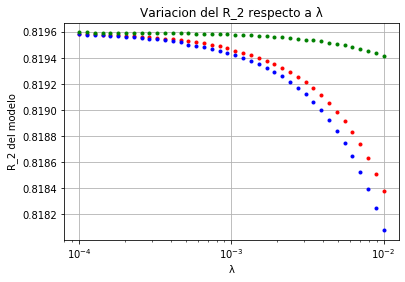

In [2]:
# sklearn
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import dot, transpose
from sklearn import linear_model

X_train = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y_train = [[7], [9], [13], [17.5], [18]]

X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]

#Calculo de los parametros para distintos landas
n_alphas = 40
#L=np.linspace(0.00001,0.01,n_alphas)
L = np.logspace(-4, -2, n_alphas)

R_2_Elastic=[]
R_2_Lasso=[]
R_2_ridge=[]

for i in L:
    Elastic = linear_model.ElasticNet(alpha=i, fit_intercept=False)
    Elastic.fit(X_train, y_train)
    R_2_Elastic.append( Elastic.score(X_test, y_test) )

    Lasso = linear_model.Lasso(alpha=i, fit_intercept=False)
    Lasso.fit(X_train, y_train)
    R_2_Lasso.append( Lasso.score(X_test, y_test) )

    ridge = linear_model.Ridge(alpha=i, fit_intercept=False)
    ridge.fit(X_train, y_train)
    R_2_ridge.append( ridge.score(X_test, y_test) )


plt.figure(1)
plt.xscale('log')
plt.plot(L,R_2_Elastic,'r.')
plt.plot(L,R_2_Lasso,'b.')
plt.plot(L,R_2_ridge,'g.')
plt.xlabel('λ')
plt.ylabel('R_2 del modelo')
plt.title('Variacion del R_2 respecto a λ')
plt.grid(True)
plt.show()

### 4.3.2 Ejemplo 2 ( 10 min - 2 pts )

Dada la siguiente dataset ,generar la siguiente grafica:
* Grafique $R^2$ vs $λ$
* $λ$ debe variar [$10^{-3} ,10^{-1.3}$ ]
* Se usaran todas regularizaciones vistas anteriormente

Pd. Todas las graficas deben mostrarce en una sola figura

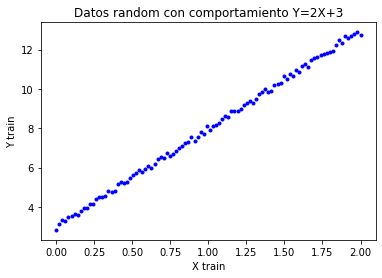

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform,random
from sklearn import linear_model

np.random.seed(100)

# Creación de data de entrenamiento
n_datos=100
X_train = np.linspace(0, 2, n_datos)
y_train = 3 +5 * X_train + np.random.randn(1,n_datos)[0] * 0.1

n_datos=20
X_test = np.linspace(0, 2, n_datos)
y_test = 3 +5 * X_test + np.random.randn(1,n_datos)[0] * 0.1

plt.title('Datos random con comportamiento Y=2X+3')
plt.xlabel('X train')
plt.ylabel('Y train')
plt.plot(X_train,y_train,'b.')
plt.show()

### 4.3.3 Ejemplo 2 ( Solucion )

El R_2 maximo es: 0.7587359717475349


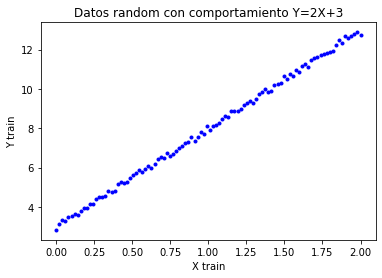

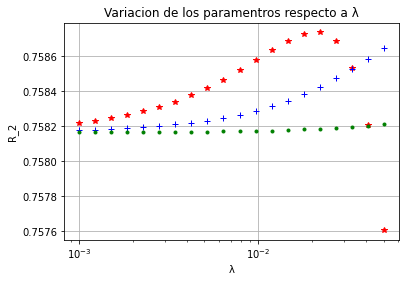

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform,random
from sklearn import linear_model

np.random.seed(100)

# Creación de data de entrenamiento
n_datos=100
X_train = np.linspace(0, 2, n_datos)
y_train = 3 +5 * X_train + np.random.randn(1,n_datos)[0] * 0.1

n_datos=20
X_test = np.linspace(0, 2, n_datos)
y_test = 3 +5 * X_test + np.random.randn(1,n_datos)[0] * 0.1


X_train_re=X_train.reshape((len(X_train),1))
y_train_re=y_train.reshape((len(y_train),1))

X_test_re=X_test.reshape((len(X_test),1))
y_test_re=y_test.reshape((len(y_test),1))


plt.figure(1)
plt.title('Datos random con comportamiento Y=2X+3')
plt.xlabel('X train')
plt.ylabel('Y train')
plt.plot(X_train,y_train,'b.')


n_alphas = 20
L = np.logspace(-3, -1.3, n_alphas)

R_2_Elastic=[]
R_2_Lasso=[]
R_2_ridge=[]
for i in L:
    Elastic = linear_model.ElasticNet(alpha=i, fit_intercept=False)
    Elastic.fit(X_train_re, y_train_re)
    R_2_Elastic.append( Elastic.score(X_test_re, y_test_re) )

    Lasso = linear_model.Lasso(alpha=i, fit_intercept=False)
    Lasso.fit(X_train_re, y_train_re)
    R_2_Lasso.append( Lasso.score(X_test_re, y_test_re) )

    ridge = linear_model.Ridge(alpha=i, fit_intercept=False)
    ridge.fit(X_train_re, y_train_re)
    R_2_ridge.append( ridge.score(X_test_re, y_test_re) )




maximos=[max(R_2_Elastic) , max(R_2_Lasso) , max(R_2_ridge)]

print('El R_2 maximo es: '+str(max(maximos)))
plt.figure(2)
plt.xscale('log')
plt.plot(L,R_2_Elastic,'r*')
plt.plot(L,R_2_Lasso,'b+')
plt.plot(L,R_2_ridge,'g.')
plt.xlabel('λ')
plt.ylabel('R_2')
plt.title('Variacion de los paramentros respecto a λ')
plt.grid(True)



## 4.4 Tarea 3.1

Implementar dataset con las siguientes caracteristicas:

* Variables explicativas ( $x1$ )
* Varaible resultado ( $y1$ ) , comportamiento de polinomio de grado 3
* Se deben añadir ruido al data set.

Se debera implementar un modelo con la siguientes caracteristicas:

* Modelo polinomial simple de grado 3.
* El modelo debe tener una regularizacion Ridge.
* Elegir el parametro de penalizacion con un valor arbitario.
* El metodo de optimizacion debe ser el descenso de gradiente.




